## Your first endaveours with Brightway using a jupyter notebook, Activity Browser, and an excel spreadsheet


Please go through the very basic first notebook first. It explains ana-/miniconda, environments, and much more.

This notebook has been made by karin.treyer@psi.ch

### 1. Installing activity browser on your computer, and opening it (*in conda prompt window*)

Activity Browser: Follow the setup instructions from ab [here](https://github.com/LCA-ActivityBrowser/activity-browser). There are different ways how you can install AB. You will already understand the "quick way" installation by now, which is shown here:

```conda create -n ab -c conda-forge --solver libmamba activity-browser```

```conda activate ab```

```activity-browser``` --> with this you open/access the package "activity-browser", which has been brought to your ab environment during installation. 

Activity Browser "sees" all the projects you have on your computer, and adopts all new projects you create and all new databases as you are working. This means that you can open one conda prompt, open anaconda; and then open another conda prompt, activate the project you are working on, work on it, and all changes will appear in AB.

### 2. Create an environment for your project, in which you "install" brightway (*in a second conda prompt window*)

Brightway2: Follow the setup instruction from bw2 [here](https://docs.brightway.dev/en/legacy/content/setup/setup.html).

Namely: ```conda create -n yourenv brightway2 jupyterlab``` creates the environment AND fetches the two packages brightway2 and jupyterlab from the channel conda-forge. 

"Open" BW = using the code in a jupyter notebook:
With ```conda activate yourenv```, you access the environment so that you can make use of all the packages which are included in it, such as LCA calculations, handling of LCA databases, etc.

Open jupyter so that you can work on a notebook: ```jupyter lab```

# Your first LCA project

Now that you have understood how to get the bw2 package on your computer and you want to do what your heart strives for: LCA.

### My small project: Hydrogen production via Steam Methane Reforming and via water electrolysis

It's good practice to describe your project shortly, and which data you are using.

Origin of LCI data: 
* ecoinvent v3.9.1 cut-off system
* literature data
* original data from company X  (confidential)


This notebook runs on the following versions:
 - BW 2.4.3
 - bw2io 0.8.8
 - numpy 1.25.1
 - ecoinvent v3.9.1 cutoff
 - python 3.10.11



 This notebook does the following:
 - Import the biosphere, LCIA methods 
  - Import the background database ecoinvent
  - Import the foreground inventories

  (you can look at all these databases in AB in a human friendly way)
  
  - Calculate the LCIA results, create an easy plot, but additionally output them as csv file so that you can visualise them in excel if you are not used to visualisation with python.

### 1. Notebook preparations
* Import packages
* create biosphere and ecoinvent
* if needed: create future background databases with premise package including all additional LCI, e.g. methanol, updated steel, cement etc.. Use future databases for modelling deployment pathways

In [98]:
#Import all necessary python packages

import brightway2 as bw #this includes the sub-modules bw2io, bw2data, bw2calc

#often, we also use other nice python packages. For each of these, very helpful Cheat Sheets exist on the web! 
import pandas as pd #for data handling with dataframes
import numpy as np #for calculations

#plotting: often, the following are used:
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Setting up and handling projects

--> **You can do the next steps in ActivityBrowser if you prefer. It's possible to create, rename, and delete projects there.**

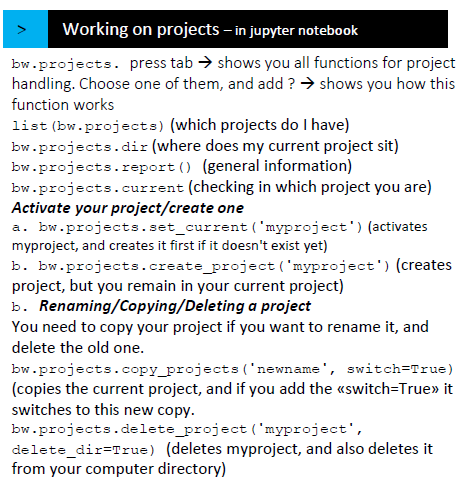


Checking which projects exist on my computer - to see which ones are there, or if you have forgotten the name of your project:


In [99]:
list(bw.projects) #the prefix "bw" shows that "projects" is taken from the brightway2 package.
#This is the same list as present in Activity Browser!

[Project: default,
 Project: twingtec,
 Project: sob,
 Project: pv_huimin,
 Project: StL_plants,
 Project: esa_gslact_june23,
 Project: sssd,
 Project: sssd_csv,
 Project: awe_softwing,
 Project: awe_twingtec,
 Project: synhelion391,
 Project: demo,
 Project: success,
 Project: Residual mixes,
 Project: awe_samuel,
 Project: coursePSI,
 Project: cement,
 Project: deepgeothermal,
 Project: wurst,
 Project: geoenvi,
 Project: demopingpong,
 Project: newproject,
 Project: residual_mixes]

Let's create a project (or activate it when you come back to work on your project)

In [100]:
bw.projects.set_current('demo') #(activates my project, or creates it first if it doesn't exist yet)

### 2. Filling your project with the biosphere, LCIA methods, and ecoinvent

--> **You can do the next steps in ActivityBrowser if you prefer. It's possible to import biosphere, LCIA methods, and ecoinvent (and other databases) there.**

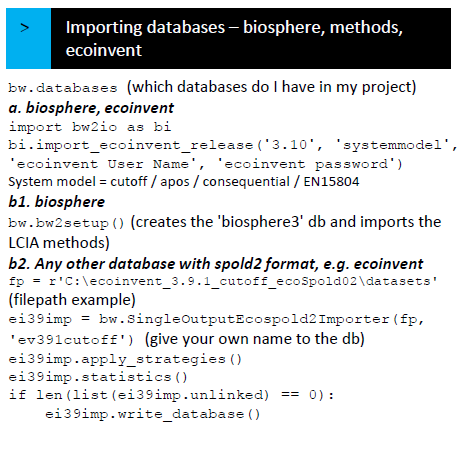


You only have to import the databases once. After that, they will be present in your project.

In [101]:
#Check if there are databases in the project, and how they are named. 
list(bw.databases)

['biosphere3', 'ev391cutoff', 'h2_electrolysis', 'hydrogen_demo']

There exist two ways of how to import the necessary databases. Do either option A or option B, but you don't have to execute both!

*Option A*: Import the biosphere, LCIA methods, and ecoinvent all in one go

In [ ]:
import bw2io as bi
bi.import_ecoinvent_release('3.10', 'systemmodel', 'ecoinvent User Name', 'ecoinvent password')
#the user name is the same as the one you are using to access the ecoinvent ecoquery. In case you need support because you don't know your ecoinvent credentials, please contact the ecoinvent helpdesk.
#System model = cutoff / apos / consequential / EN15804

In [ ]:
#Let's check if the databases are there
list(bw.databases)

*Option B*: In most existing notebooks you will find on the web, you will still see the old way of importing all these:

In [102]:
#import the biosphere and LCIA methods
bw.bw2setup()
#this creates the database "biosphere3"

Biosphere database already present!!! No setup is needed


In [103]:
#importing ecoinvent
#Let's first check if the ecoinvent database is already present in the project

if 'ev391cutoff' not in bw.databases:
    ei_path = r'C:\Users\treyer_k\Documents\PSI\Brightway\ecoinvent\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets' #this is the path to the ecoinvent database on my computer
    ei = bw.SingleOutputEcospold2Importer(ei_path, 'ev391cutoff') #recommendation for consistent databases naming: database name (ecoinvent), version number, system model
    ei.apply_strategies() #fixing some issues when ecoinvent and brightway have to talk together by going through all datasets and manipulating them in a specific way
    ei.statistics() #checking if everything worked out with strategies and linking
    ei.write_database() #save the database to our hard drive
else:
    print('Database already exists')

Database already exists


You may want to switch to AB now to look at the databases you have just imported. In case they are not yet displayed in your project, switch to another project and switch back for the new database(s) to appear

### 3. Importing your own data
And now we want to import our own inventories

In [ ]:
imp = bw.ExcelImporter(r'C:\Users\treyer_k\Documents\PSI\Brightway\departdesentier\Webinar FSLCI\lci_hydrogen_electrolysis.xlsx') #give the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ev391cutoff", fields=('name','unit','location', 'reference product')) #, 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)

imp.write_database()

Again, you can look at this database in AB.

This worked smoothly. It won't always work so smoothly!! 
This is demonstrated with the next spreadsheet.

In [ ]:
imp = bw.ExcelImporter(r'C:\Users\treyer_k\Documents\PSI\Brightway\departdesentier\Webinar FSLCI\lci_rawdata_import.xlsx')
imp.apply_strategies()
imp.match_database("ev391cutoff", fields=('name','unit','location', 'reference product'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel() #(only_unlinked=True)
list(imp.unlinked)

imp.write_database()

There are some unlinked flows. This means that no corresponding dataset for an exchange listed in the spreadsheet could be found. 
Usually, this is because of types, wrong type, wrong unit, etc.
Open the excel file with the unlinked flows. It will show you the lines where a problem has occurred. 
Did you find the errors?

In the first activity, I misspelled "granulate" in the reference product.
In the second case, I put "biosphere" as type instead of "technosphere".
And in the third case, I am using a location for which no market for deionised water exists. It should be CH, not AT.

Correct these errors, save the file and run the cell above again. Only when all exchanges could be linked the database will be written. 

In [ ]:
list(bw.databases)

### 4. Looking at the databases

This is more human friendly in AB! For quick overviews, searches etc., AB is more convenient than the jupyter notebook.
The cheatsheet summarises how you can do searches. Try it yourself.

If you want to know more about how this works, the keyword is "list comprehension".

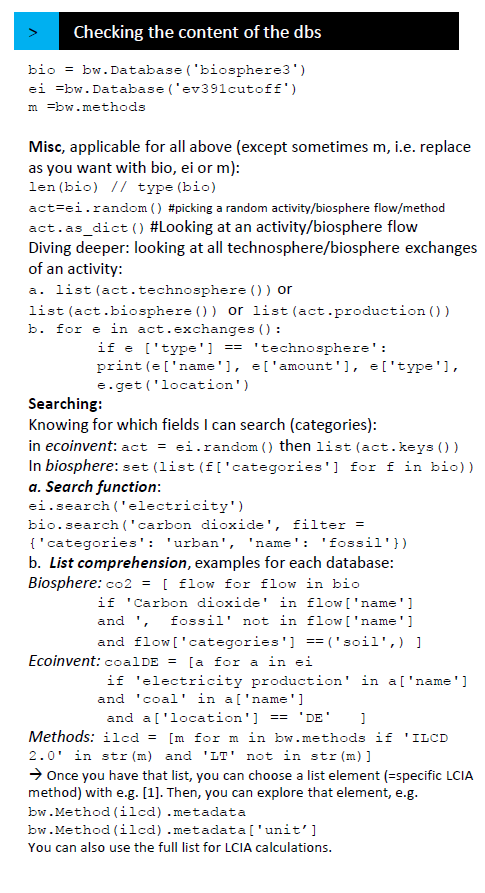

First, we choose the activities we want to analyse later in the LCA. Here, I want to compare hydrogen production with different electrolysers.

In [104]:
h2elec =  bw.Database('h2_electrolysis')

In [105]:
h2prod = [a for a in h2elec if 'hydrogen production, gaseous' in a ['name']]
h2prod

['hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity' (kilogram, RER, None),
 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity' (kilogram, CH, None)]

We can look at one of these activities here. 
But you might prefer to do that in AB.

In [106]:
list(h2prod[0].technosphere())

[Exchange: 2.11864406779661e-06 unit 'electrolyzer production, 1MWe, SOEC, Stack' (unit, RER, None) to 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: 2.6483050847457627e-07 unit 'electrolyzer production, 1MWe, SOEC, Balance of Plant' (unit, RER, None) to 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: -2.11864406779661e-06 unit 'treatment of fuel cell stack, 1MWe, SOEC' (unit, RER, None) to 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: -2.6483050847457627e-07 unit 'treatment of fuel cell balance of plant, 1MWe, SOEC' (unit, RER, None) to 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: 42.3 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, CH, None) to 'hydrogen production, gaseous, 1 ba

We also need to choose LCIA methods. Here, I only chose to compare the different IPCC GWP time horizons to make it simple

In [107]:
#if you don't know the names of the different LCIA methods, you can check all methods in AB, or get a list of all of them here.
bw.methods

Methods dictionary with 762 objects, including:
	('CML v4.8 2016', 'acidification', 'acidification (incl. fate, average Europe total, A&B)')
	('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
	('CML v4.8 2016', 'ecotoxicity: freshwater', 'freshwater aquatic ecotoxicity (FAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: marine', 'marine aquatic ecotoxicity (MAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: terrestrial', 'terrestrial ecotoxicity (TETP inf)')
	('CML v4.8 2016', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')
	('CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)')
	('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)')
	('CML v4.8 2016', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)')
	('CML v4.8 2016', 'ozone depletion', 'ozone layer depletion (ODP steady state)')
Use `list(this object)` to get the complete list.

In [108]:
ipcc = [m for m in bw.methods if 'IPCC' in str(m) and '2021' in str(m) and 'GWP' in str(m) and 'LT' not in str(m) and 'fossil' not in str(m) and 'biogenic' not in str(m) and 'land use' not in str(m) and 'SLCFs' not in str(m)]
ipcc

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP20)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP500)')]

### 5. Doing an LCA

![image.png](attachment:90ed20b7-44fd-476e-8587-895429d0eb59.png)

In [109]:
#defining the Functional Units: we want "1" of the activities which produce hydrogen.
FU = [{x:1} for x in h2prod]

In [110]:
#using a BW function to do the LCA:
bw.calculation_setups['GWPs_electrolysis'] = {'inv':FU, 'ia': ipcc}
mylca = bw.MultiLCA('GWPs_electrolysis')
mylca.results

array([[ 2.08699252,  2.56224354,  1.87522907],
       [ 2.37768163,  2.92877938,  2.12446525],
       [19.44666033, 21.77269231, 18.49650254],
       [ 3.72065732,  4.44758195,  3.41470436]])

That's nice, but not very human friendly. Let's look at a snippet of these results.

In [111]:
{k:v for k,v in zip(ipcc, mylca.results[0])}

{('IPCC 2021',
  'climate change',
  'global warming potential (GWP100)'): 2.0869925159864753,
 ('IPCC 2021',
  'climate change',
  'global warming potential (GWP20)'): 2.5622435401312047,
 ('IPCC 2021',
  'climate change',
  'global warming potential (GWP500)'): 1.8752290742875801}

Better, but still not so convenient. We are using pandas to show the results in a way which is better defined.

In [112]:
mylcadf = pd.DataFrame(index = ipcc, columns = [(x['name'], x['location']) for y in FU for x in y], data=myLCA.results.T)
mylcadf


,"(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity, RER)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity, CH)"
"(IPCC 2021, climate change, global warming potential (GWP100))",3.720657,19.446660,2.086993,2.377682
"(IPCC 2021, climate change, global warming potential (GWP20))",4.447582,21.772692,2.562244,2.928779
"(IPCC 2021, climate change, global warming potential (GWP500))",3.414704,18.496503,1.875229,2.124465


In [113]:
#export to excel, e.g. for creating figures
mylcadf.to_excel('lcia_results.xlsx')

### 5. Contribution analysis

This has become much more intuitive in bw2.5. But for us in bw2, we can do the two cells below.

This will calculate the contribution of each exchange to the total score in absolute and relative terms; and the original amount used of that exchange in the activit<. > 



In [114]:
from polyviz.utils import calculate_supply_chain

In [ ]:
df = pd.DataFrame()
for act in h2prod:
    for m in ipcc:
        print(act, m) #This is only to see the progress
        #use the function to calculate the contribution analysis
        data = calculate_supply_chain(act, m, 2, 1e-4)[0]  #Here, you can choose how many levels you want to explore, and which cut-off you want to choose)
        
        #add the name of the activity and the name of the method
        data = [[act['name'], act['location'], '-'.join(m)] + d for d in data]
        df = pd.concat([df, pd.DataFrame(data)], axis=0, ignore_index=True)
df.columns = ['activity', 'location_activity', 'lcia_method', 'level', 'contribution share', 'absolute score', 'amount_in_dataset', 'activity_contributing', 'location_contributing', 'unit']
df.to_excel('contribution.xlsx')

### 5. Easy plotting

You can use seaborn or matplotlib for plotting. For very easy plotting, pandas also comes with some functions. 

In [115]:
#we are using the mylcadf dataframe created further above.
mylcadf

,"(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity, RER)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity, CH)"
"(IPCC 2021, climate change, global warming potential (GWP100))",3.720657,19.446660,2.086993,2.377682
"(IPCC 2021, climate change, global warming potential (GWP20))",4.447582,21.772692,2.562244,2.928779
"(IPCC 2021, climate change, global warming potential (GWP500))",3.414704,18.496503,1.875229,2.124465


In [122]:
print(mylcadf.columns.tolist())

[('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity', 'CH'), ('hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity', 'CH'), ('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity', 'RER'), ('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity', 'CH')]


We relabel the names so that they are shorter

In [116]:
ipcc

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP20)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP500)')]

In [117]:
# More human friendly labels:
labels_methods = {
"('IPCC 2021', 'climate change', 'global warming potential (GWP100)')": "IPCC\nGWP100", 
"('IPCC 2021', 'climate change', 'global warming potential (GWP20)')": 'IPCC\nGWP20',
"('IPCC 2021', 'climate change', 'global warming potential (GWP500)')": 'IPCC\nGWP500',  
 }

In [118]:
h2prod

['hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity' (kilogram, RER, None),
 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity' (kilogram, CH, None)]

In [125]:
labels_act =  { "('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity', 'CH')": "SOEC_with_steam",
"('hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity', 'CH')": "AEC", 
"('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity', 'RER')": "PEM",
"('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity', 'CH')": "SOEC" }

In [126]:
df = mylcadf.rename(columns = labels_act, index = labels_methods)
df

,"(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity, RER)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity, CH)"
"(IPCC 2021, climate change, global warming potential (GWP100))",3.720657,19.446660,2.086993,2.377682
"(IPCC 2021, climate change, global warming potential (GWP20))",4.447582,21.772692,2.562244,2.928779
"(IPCC 2021, climate change, global warming potential (GWP500))",3.414704,18.496503,1.875229,2.124465


Now we plot the dataframe

In [ ]:
# plot data
df.plot.bar(xlabel='Impact category', ylabel='Impact score', figsize=(14,8))

# rotate xticks for horizontal impact category names
plt.xticks(rotation=0)

We can also normalise.

In [ ]:
# normalize
df = (df.T / df.abs().max(axis=1)).T

# activate grid and set font size
plt.rcParams.update({
    'font.size': 16,
    'axes.grid': True,
    'axes.grid.which': 'major',
    'axes.axisbelow': True,
})

# plot data
df.plot.bar(xlabel='Impact category', ylabel='Impact score', figsize=(14,8))

# rotate xticks for horizontal impact category names
plt.xticks(rotation=0)